Principal Component Analysis (PCA) for facial recognition and generation using CelebFaces Attributes (CelebA) Dataset

This project was coded by **Irem Aslan-2101956**

**Explanation about the code:**

 This code was created using Google Colab (because the celebA dataset was very large, it took a lot of time for this code to run on my own computer.) In order for the code to work, the celeba dataset must be loaded in the files section of colab and you need to copy and paste this path to the relevant section in the code. . I showed the outputs of my own code in Jupyter notebook.

Loaded 2115 images, converted to grayscale.


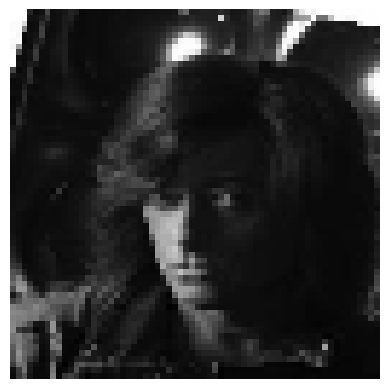

In [53]:
import os
import cv2
import matplotlib.pyplot as plt

def load_and_resize_images(image_directory, target_size=(64, 64), convert_gray=False):
    resized_images = []
    for filename in os.listdir(image_directory):
        img_path = os.path.join(image_directory, filename)
        if filename.endswith(".jpg"):
            # Load the Images
            file_path = os.path.join(image_directory, filename)

            # Load the Images with OpenCV
            img = cv2.imread(file_path)

            if convert_gray:
                # Convert image to grayscale (before converting from BGR to RGB)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

            # Resize image
            img = cv2.resize(img, target_size)

            resized_images.append(img)

    return resized_images

path_to_images = '/content/img_align_celeba'
images = load_and_resize_images(path_to_images, convert_gray=True)
print(f'Loaded {len(images)} images, converted to grayscale.')

# Show first picture to check
plt.imshow(images[0], cmap='gray')
plt.axis('off')
plt.show()


In [54]:
import numpy as np

def images_to_vectors(images):
  image_vectors = np.array([np.array(image).flatten () for image in images])
  return image_vectors

# Convert images to vectors

image_vectors = images_to_vectors(images)
print(f'Converted {len(image_vectors)} images to vectors. Vector shape: {image_vectors[0].shape}')


Converted 2115 images to vectors. Vector shape: (4096,)


In [55]:
def center_data(image_vectors):
  mean_vector = np.mean(image_vectors, axis=0)
  centered_vectors = image_vectors - mean_vector
  return centered_vectors, mean_vector


centered_vectors, mean_vector = center_data(image_vectors)
print(f'Data centered. Shape of centered vectors: {centered_vectors.shape}')

Data centered. Shape of centered vectors: (2115, 4096)


In [56]:
from sklearn.decomposition import PCA

def perform_pca(centered_vectors, n_components=0.95):
  pca = PCA(n_components=n_components)
  transformed_data = pca.fit_transform(centered_vectors)
  return pca, transformed_data

pca, principal_components = perform_pca(centered_vectors)
print(f'PCA Completed. Number of components: {pca.n_components_} ')

PCA Completed. Number of components: 257 


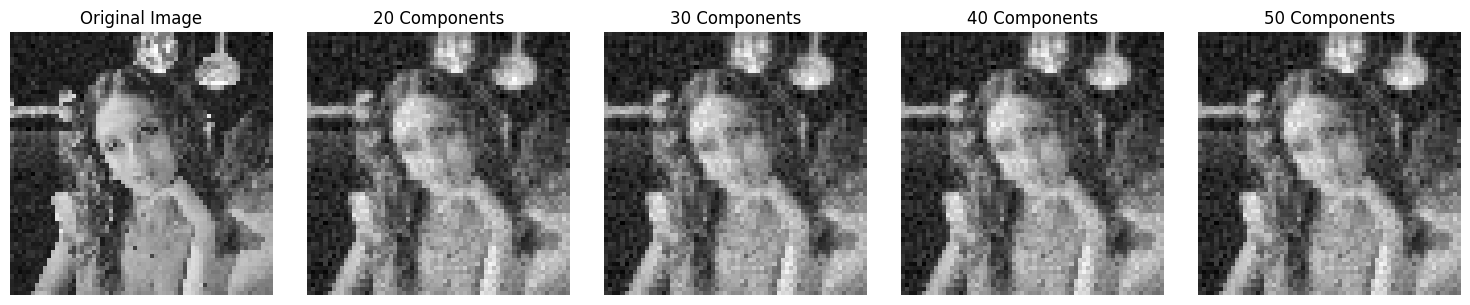

In [57]:
import numpy as np
import cv2
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load and preprocess your image
def load_and_preprocess_image(image_path, target_size=(64, 64)):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE) # Load image as grayscale
    img = cv2.resize(img, target_size, interpolation=cv2.INTER_LANCZOS4) # Resize with high-quality interpolation
    img_array = np.array(img)
    return img_array.flatten()

# Center the data
def center_data(image_vector, mean_vector):
    return image_vector - mean_vector

# Function to perform PCA and reconstruct the image
def reconstruct_image(centered_image_vector, pca, n_components):
    pca.n_components = n_components
    transformed_vector = pca.transform([centered_image_vector])
    reconstructed_vector = pca.inverse_transform(transformed_vector)
    return reconstructed_vector + mean_vector

# Load your face
image_vector = load_and_preprocess_image('/content/myFace.826.jpg')

# Assuming you have already defined `centered_vectors` and `mean_vector` somewhere in your code

pca = PCA()
pca.fit(centered_vectors)

centered_image_vector = center_data(image_vector, mean_vector)

n_components_list = [20, 30, 40, 50]
reconstructions = {n: reconstruct_image(centered_image_vector, pca, n) for n in n_components_list}

# Visualization of the results
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(15, 3))
axes[0].imshow(image_vector.reshape(64, 64), cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

for idx, n in enumerate(n_components_list):
    axes[idx + 1].imshow(reconstructions[n].reshape(64, 64), cmap='gray')
    axes[idx + 1].set_title(f'{n} Components')
    axes[idx + 1].axis('off')

plt.tight_layout()
plt.show()


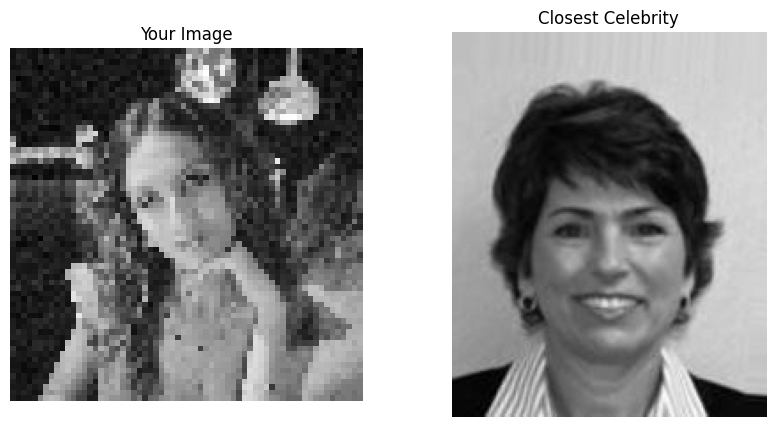

Closest celebrity face is at index 1799 with a distance of 3926.9543895252364.


In [58]:
import numpy as np
from sklearn.decomposition import PCA
import cv2
import matplotlib.pyplot as plt
from scipy.spatial import distance
import os

# Load and preprocess your image
def load_and_preprocess_image(image_path, target_size=(64, 64)):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE) # Load image as grayscale
    img = cv2.resize(img, target_size) # Resize to match dataset images
    img_array = np.array(img)
    return img_array.flatten()

# Fit PCA on the entire dataset
pca = PCA(n_components=50)
pca.fit(centered_vectors)

# Project the dataset into PCA space
projected_data = pca.transform(centered_vectors)

# Load, process, and project your own image
your_image_path = '/content/myFace.826.jpg'
your_image_vector = load_and_preprocess_image(your_image_path)
your_centered_vector = your_image_vector - pca.mean_
your_pca_vector = pca.transform([your_centered_vector])[0]

# Find the closest celebrity in the PCA space
def find_closest_face(projected_data, your_pca_vector):
    min_dist = float('inf')
    closest_index = -1
    for i, face_vector in enumerate(projected_data):
        dist = distance.euclidean(face_vector, your_pca_vector)
        if dist < min_dist:
            min_dist = dist
            closest_index = i
    return closest_index, min_dist

closest_index, closest_distance = find_closest_face(projected_data, your_pca_vector)

# Visualization

dataset_directory = '/content/img_align_celeba'
image_filenames = sorted(os.listdir(dataset_directory))
image_paths = [os.path.join(dataset_directory, filename) for filename in image_filenames]

# Display your image and closest match
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Your Image
axes[0].imshow(your_image_vector.reshape(64, 64), cmap='gray')
axes[0].set_title('Your Image')
axes[0].axis('off')

# Closest Celebrity Image
closest_face_path = image_paths[closest_index]
closest_face_image = cv2.imread(closest_face_path, cv2.IMREAD_GRAYSCALE)
axes[1].imshow(closest_face_image, cmap='gray')
axes[1].set_title('Closest Celebrity')
axes[1].axis('off')
plt.show()

print(f"Closest celebrity face is at index {closest_index} with a distance of {closest_distance}.")


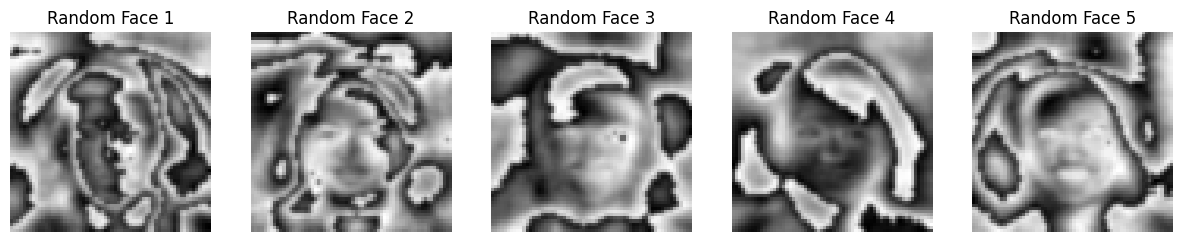

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import cv2

# Assuming pca is already fitted to your data with n_components
def generate_random_faces(pca, mean_vector, n_samples=5, scale_factor=3):
    random_faces = []
    components = pca.components_
    std_devs = np.sqrt(pca.explained_variance_)

    for _ in range(n_samples):
        random_coeffs = np.random.randn(len(std_devs)) * std_devs * scale_factor
        # Reshape mean_vector to match the shape of components
        mean_vector_reshaped = mean_vector.reshape(1, -1)
        face_vector = mean_vector_reshaped + np.dot(random_coeffs, components)
        face_image = np.uint8(face_vector.reshape(64, 64))

        # Resize the face to a larger size
        face_image_large = cv2.resize(face_image, (128, 128), interpolation=cv2.INTER_LINEAR)

        # Apply Gaussian blur to smooth out pixelation
        face_image_blurred = cv2.GaussianBlur(face_image_large, (5, 5), 0)

        # Resize the face to the original size
        face_image_resized = cv2.resize(face_image_blurred, (64, 64), interpolation=cv2.INTER_LINEAR)

        random_faces.append(face_image_resized)

    return random_faces

n_samples = 5

random_faces = generate_random_faces(pca, pca.mean_, n_samples)

fig, axes = plt.subplots(1, n_samples, figsize=(15, 3))
for i, face in enumerate(random_faces):
    axes[i].imshow(face, cmap='gray')
    axes[i].set_title(f'Random Face {i+1}')
    axes[i].axis('off')

plt.show()


Mean Squared Error scores for each face: [744.4615619501469, 1040.2698534091592, 538.7988356478807, 555.5062950036938, 515.260849664496]
Average Mean Squared Error across the faces: 678.8594791350754


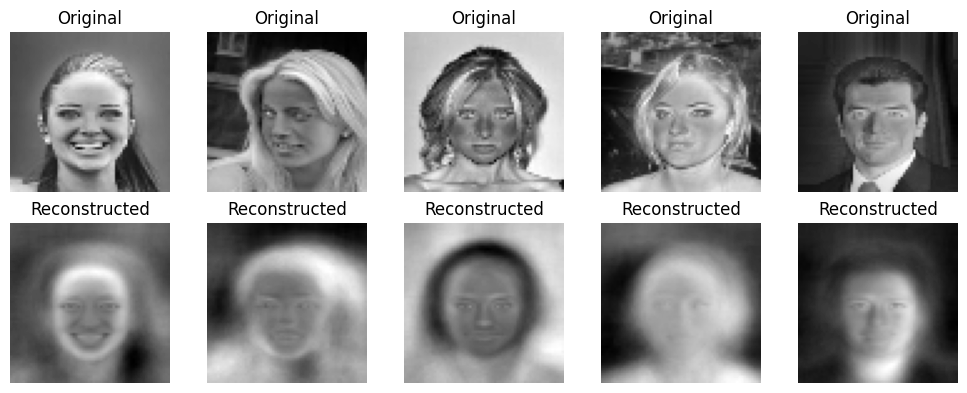

In [60]:
from sklearn.metrics import mean_squared_error

def reconstruct_faces(pca, mean_vector, components, n_components):

  reconstruct_faces = np.dot(components[:, :n_components], pca.components_[:n_components, :]) + mean_vector
  return reconstruct_faces

n_samples = 5
random_indices = np.random.randint(low=0, high=len(centered_vectors), size=n_samples)
test_faces = centered_vectors[random_indices]

test_projected = pca.transform(test_faces)
reconstructed_test_faces = reconstruct_faces(pca, pca.mean_, test_projected, n_components=30)

mse_scores = [mean_squared_error(original.flatten(), reconstructed.flatten()) for original, reconstructed in zip(test_faces, reconstructed_test_faces)]
average_mse = np.mean(mse_scores)

print("Mean Squared Error scores for each face:", mse_scores)
print("Average Mean Squared Error across the faces:", average_mse)

fig, axes = plt.subplots(2, n_samples, figsize=(10, 4))
for i in range(n_samples):
    axes[0, i].imshow(test_faces[i].reshape(64, 64), cmap='gray')
    axes[0, i].set_title(f'Original')
    axes[0, i].axis('off')

    axes[1, i].imshow(reconstructed_test_faces[i].reshape(64, 64), cmap='gray')
    axes[1, i].set_title(f'Reconstructed')
    axes[1, i].axis('off')

plt.tight_layout()
plt.show()